 # <center>Numpy基础</center>

# 1 - Ndarray 对象
- NumPy 最重要的一个特点是其 N 维数组对象 ndarray，它是一系列同类型数据的集合，以 0 下标为开始进行集合中元素的索引。
- ndarray 对象是用于存放同类型元素的多维数组。
- ndarray 中的每个元素在内存中都有相同存储大小的区域。
- ndarray 内部由以下内容组成：
    - 一个指向数据（内存或内存映射文件中的一块数据）的指针。
    - 数据类型或 dtype，描述在数组中的固定大小值的格子。
    - 一个表示数组形状（shape）的元组，表示各维度大小的元组。
    - 一个跨度元组（stride），其中的整数指的是为了前进到当前维度下一个元素需要"跨过"的字节数。

## 1.1 - 创建方法
numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)

|  参数   | 描述  |
|  :----:  |  :----  |
| object  | 数组或嵌套的数列 |
| dtype  | 数组元素的数据类型，可选  |
| cpoy  | 对象是否需要复制，可选 |
| order  | 创建数组的样式，C为行方向，F为列方向，A为任意方向（默认） |
| subok  | 默认返回一个与基类类型一致的数组 |
| ndmin  | 指定生成数组的最小维度 |

In [148]:
import numpy as np
import numpy.matlib

In [3]:
# 一维数组
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [9]:
# 多个维度
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
# 最小维度
a = np.array([1,2,3,4,5,6],ndmin=2)
a

array([[1, 2, 3, 4, 5, 6]])

In [11]:
# dtype参数
a = np.array([1,2,3,4], dtype=complex)
a

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j])

## 1.2 -  数据类型对象

- 数据类型对象（numpy.dtype 类的实例）用来描述与数组对应的内存区域是如何使用，它描述了数据的以下几个方面：：
    - 数据的类型（整数，浮点数或者 Python 对象）
    - 数据的大小（例如， 整数使用多少个字节存储）
    - 数据的字节顺序（小端法或大端法）
    - 在结构化类型的情况下，字段的名称、每个字段的数据类型和每个字段所取的内存块的部分
    - 如果数据类型是子数组，那么它的形状和数据类型是什么。
- 字节顺序是通过对数据类型预先设定 < 或 > 来决定的。 < 意味着小端法(最小值存储在最小的地址，即低位组放在最前面)。> 意味着大端法(最重要的字节存储在最小的地址，即高位组放在最前面)。

- dtype 对象是使用以下语法构造的： numpy.dtype(object, align, copy)
    - object - 要转换为的数据类型对象
    - align - 如果为 true，填充字段使其类似 C 的结构体。
    - copy - 复制 dtype 对象 ，如果为 false，则是对内置数据类型对象的引用

In [14]:
# 使用标量类型
dt = np.dtype(np.int32)
dt

dtype('int32')

In [15]:
# int8, int16, int32, int64 四种数据类型可以使用字符串 'i1', 'i2','i4','i8' 代替
dt = np.dtype('i4')
print(dt)

int32


In [16]:
# 字节顺序标注
dt = np.dtype('<i4')
dt

dtype('int32')

In [19]:
# 首先创建结构化数据类型
dt = np.dtype([('age',np.int8)])
dt

dtype([('age', 'i1')])

In [22]:
# 将数据类型应用于ndarray对象
a = np.array([(10,),(20,),(30,)], dtype=dt)
a
# 类型字段名可以用于存取实际的 age 列
print(a['age'])

[10 20 30]


In [24]:
# 实例
student = np.dtype([('name','S20'), ('age', 'i1'), ('marks', 'f4')]) 
student
a = np.array([('abc', 21, 50),('xyz', 18, 75)], dtype = student) 
print(a)

[(b'abc', 21, 50.) (b'xyz', 18, 75.)]


# 2 -  数组属性

- NumPy 数组的维数称为秩（rank），秩就是轴的数量，即数组的维度，一维数组的秩为 1，二维数组的秩为 2，以此类推。
- 在 NumPy中，每一个线性的数组称为是一个轴（axis），也就是维度（dimensions）。比如说，二维数组相当于是两个一维数组，其中第一个一维数组中每个元素又是一个一维数组。所以一维数组就是 NumPy 中的轴（axis），第一个轴相当于是底层数组，第二个轴是底层数组里的数组。而轴的数量——秩，就是数组的维数。
- 很多时候可以声明 axis。axis=0，表示沿着第 0 轴进行操作，即对每一列进行操作；axis=1，表示沿着第1轴进行操作，即对每一行进行操作。
- NumPy 的数组中比较重要 ndarray 对象属性有：

|  属性   | 说明  |
|  :----:  |  :----  |
| ndarray.ndim  | 秩，轴的数量或维度的数量 |
| ndarray.shape  | 数组的维度，对于矩阵，n行m列  |
| ndarray.size  | 数组元素中的总个数，相当于.shape中的n*m的值 |
| ndarray.dtype  | ndarray对象的元素类型 |
| ndarray.itemsize  | ndarray 对象中每个元素的大小，以字节为单位 |
| ndarray.flags  | 	ndarray 对象的内存信息 |
| ndarray.real	|  ndarray元素的实部 | 
| ndarray.imag | ndarray 元素的虚部 | 
| ndarray.data | 包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。| 

In [29]:
# ndarray.ndim 用于返回数组的维数，等于秩。
a = np.arange(24)
print(a.ndim)
a = a.reshape(2,4,3)
a
print(a.ndim)

1
3


In [42]:
# ndarray.shape 表示数组的维度，返回一个元组，这个元组的长度就是维度的数目，即 ndim 属性(秩)。比如，一个二维数组，其维度表示"行数"和"列数"。
# ndarray.shape也可以用于调整数组的大小
a = np.array([[1,2,3],[4,5,6]])
print(a.shape)
a.shape = (3,2)
a

(2, 3)


array([[1, 2],
       [3, 4],
       [5, 6]])

In [35]:
# Numpy也提供了reshape函数来调整数组的大小
b = a.reshape(3,2)
b

array([[1, 2],
       [3, 4],
       [5, 6]])

In [89]:
# ndarray.itemsize 以字节的形式返回数组中每一个元素的大小。
# 例如，一个元素类型为 float64 的数组 itemsize 属性值为 8(float64 占用 64 个 bits，每个字节长度为 8，所以 64/8，占用 8 个字节），
# 又如，一个元素类型为 complex32 的数组 item 属性为 4（32/8）。

# 数组的 dtype 为 int8（一个字节）  
x = np.array([1,2,3,4,5], dtype = np.int8)  
print (x.itemsize)
 
# 数组的 dtype 现在为 float64（八个字节） 
y = np.array([1,2,3,4,5], dtype = np.float64)  
print (y.itemsize)

1
8


<font color=#FF2121>**注：ndarray.reshape 通常返回的是非拷贝副本，即改变返回后数组的元素，原数组对应元素的值也会改变。**</font>

In [41]:
a = np.array([[1,2,3],[4,5,6]])
b = a.reshape(6,)
b[0] = 100
print(b)
print(a)

[100   2   3   4   5   6]
[[100   2   3]
 [  4   5   6]]


# 3 - 创建数组

### numpy.empty
   - numpy.empty 方法用来创建一个指定形状（shape）、数据类型（dtype）且未初始化的数组
   - <font color=#FF2121>**注：数组元素为随机值，因为它们未初始化**</font>

numpy.empty(shape, dtype = float, order = 'C')

|  参数   | 描述  |
|  :----:  |  :----  |
| shape  | 数组形状 |
| dtype  | 数据类型，可选  |
| order  | 有"C"和"F"两个选项,分别代表，行优先和列优先，在计算机内存中的存储元素的顺序。 |

In [43]:
x = np.empty([2,3],dtype = int)
x

array([[1838338768,        455,          0],
       [         0,     131074,   40307812]])

### numpy.zeros
   - 创建指定大小的数组，数组元素以 0 来填充：

- numpy.zeros(shape, dtype = float, order = 'C')

In [49]:
# 默认为浮点数
x = np.zeros(5)
x

array([0., 0., 0., 0., 0.])

In [50]:
# 设置类型为整数
x = np.zeros((5,), dtype=int)
x

1

In [53]:
# 自定义类型
z = np.zeros((2,2), dtype = [('x', 'i4'), ('y', 'i4')])  
z

array([[0., 0.],
       [0., 0.]])

## 3.1 - 从已有的数组创建数组

### numpy.asarray

- numpy.asarray 类似 numpy.array，但 numpy.asarray 参数只有三个，比 numpy.array 少两个。

numpy.asarray(a, dtype = None, order = None)

In [56]:
# 将列表转换为数组
x = [1,2,3]
a = np.asarray(x)
a

array([1, 2, 3])

In [57]:
# 将元祖转换为数组
x = (1,2,3)
a = np.asarray(x)
a

array([1, 2, 3])

In [58]:
# 将元祖列表转换为数组
x = [(1,2,3),(4,5,6)]
a = np.asarray(x)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
# 设置dtype参数
x = [1,2,3]
a = np.asarray(x, dtype=float)
a

array([1., 2., 3.])

### numpy.frombutter

- numpy.formbuffer 用于实现动态数组
- numpy.formbuffer 接受butter输入参数，以流的形式读入转化成ndarray对象

numpy.frombuffer(buffer, dtype = float, count = -1, offset = 0) <br>
<font color=#FF2121>**注：buffer 是字符串的时候，Python3 默认 str 是 Unicode 类型，所以要转成 bytestring 在原 str 前加上 b。**</font>

|  参数   | 描述  |
|  :----:  |  :----  |
| butter  | 可以是任意对象，会以流的形式读入 |
| dtype  | 返回数组的数据类型，可选  |
| count  | 读取的数据数量，默认为-1，读取所有数据 |
| offset  | 读取的起始位置，默认为0 |

- S1和|S2字符串是数据类型描述符; 
    - S1意味着数组包含长度为1的字符串
    - S2意味着数组包含长度为2的字符串 
    - |管道符号是byteorder标志, 在这种情况下，不需要字节顺序标志，因此它设置为|，这意味着不适用。

In [84]:
s = b'Hello World'
a = np.frombuffer(s, dtype='S1')
a

array([b'H', b'e', b'l', b'l', b'o', b' ', b'W', b'o', b'r', b'l', b'd'],
      dtype='|S1')

### numpy.fromiter
- numpy.fromiter 方法从可迭代对象中建立 ndarray 对象，返回一维数组。

numpy.fromiter(iterable, dtype, count=-1)

|  参数   | 描述  |
|  :----:  |  :----  |
| iterable  | 可迭代对象 |
| dtype  | 返回数组的数据类型，可选  |
| count  | 读取的数据数量，默认为-1，读取所有数据 |

In [88]:
# 使用 range 函数创建列表对象  
list = range(5)
it=iter(list)

# 使用迭代器创建 ndarray 
x=np.fromiter(it, dtype=float)
print(x)

[0. 1. 2. 3. 4.]


## 3.2 - 从数值范围创建数组

### numpy.arange
- numpy 包中的使用 arange 函数创建数值范围并返回 ndarray 对象，函数格式如下：
- 根据 start 与 stop 指定的范围以及 step 设定的步长，生成一个 ndarray。

numpy.arange(start, stop, step, dtype)

In [90]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [91]:
# 设置数值类型
x = np.arange(5, dtype=float)
x

array([0., 1., 2., 3., 4.])

In [92]:
# 设置步长
x = np.arange(10, 20, 2)
x

array([10, 12, 14, 16, 18])

### numpy.linspace
- numpy.linspace 函数用于创建一个一维数组，数组是一个等差数列构成的，格式如下：

np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

|  参数   | 描述  |
|  :----:  |  :----  |
| start  | 序列的起始值 |
| stop  | 序列的终止值，如果endpoint为true，该值包含于数列中  |
| num  | 要生成的等步长的样本数量，默认为50 |
| endpoint  | 该值为 true 时，数列中包含stop值，反之不包含，默认是True。 |
| retstep  | 如果为 True 时，生成的数组中会显示间距，反之不显示。 |
| dtype  | ndarray 的数据类型 |

In [94]:
a = np.linspace(1, 10, 10)
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [97]:
a = np.linspace(1, 10, 3)
a

array([ 1. ,  5.5, 10. ])

In [98]:
# 设置元素全部是1的等差数列
x = np.linspace(1, 1, 10)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
a = np.linspace(10, 20, 5, endpoint=False)
a

array([10., 12., 14., 16., 18.])

In [102]:
# 设置间距
a = np.linspace(10, 30, 5, retstep=True)
a

(array([10., 15., 20., 25., 30.]), 5.0)

In [104]:
b = np.linspace(1,10,10).reshape([10,1])
b

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

### numpy.logspace
- numpy.logspace 函数用于创建一个于等比数列。格式如下：

np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)

|  参数   | 描述  |
|  :----:  |  :----  |
| start  | 序列的起始值 |
| stop  | 序列的终止值，如果endpoint为true，该值包含于数列中  |
| num  | 要生成的等步长的样本数量，默认为50 |
| endpoint  | 该值为 true 时，数列中包含stop值，反之不包含，默认是True。 |
| base  | 对数 log 的底数 |
| dtype  | ndarray 的数据类型 |

In [105]:
a = np.logspace(1.0,  2.0, num =  10) 
a

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [106]:
a = np.logspace(0,9,10,base=2)
a

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

# 4 - 切片和索引

- ndarray对象的内容可以通过索引或切片来访问和修改，与 Python 中 list 的切片操作一样。
- ndarray 数组可以基于0 - n的下标进行索引，切片对象可以通过内置的 slice 函数，并设置 start, stop 及 step 参数进行，从原数组中切割出一个新数组。

In [108]:
# slice函数
a = np.arange(10)
a
s = slice(2, 7, 2)  # 从索引 2 开始到索引 7 停止，间隔为2
a[s]

array([2, 4, 6])

In [119]:
# start:stop:step
a = np.arange(10)
b = a[2:7:2]
b

array([2, 4, 6])

In [112]:
# 和列表的切片一样
a = np.arange(10)
b = a[2:]
b = a[2:7]
b

array([2, 3, 4, 5, 6])

In [114]:
# 多维数组
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [127]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]])  
# 选择第2列元素
a[...,1]
# 选择第2行元素
a[1,...]
# # 第2列及剩下的所有元素
a[...,1:]

array([[2, 3],
       [4, 5],
       [5, 6]])

# 5 - 高级索引

NumPy 比一般的 Python 序列提供更多的索引方式。除了之前看到的用整数和切片的索引外，数组可以由整数数组索引、布尔索引及花式索引。

## 5.1 - 整数数组索引

In [124]:
# 获取数组中(0,0)，(1,1)和(2,0)位置处的元素
x = np.array([[1,2],[3,4],[5,6]])
y = x[[0,1,2],[0,1,0]]
y

array([1, 4, 5])

In [128]:
#  获取 4X3 数组中的四个角的元素
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print ('我们的数组是：' )
x

我们的数组是：


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [132]:
rows = np.array([[0,0],[3,3]]) 
cols = np.array([[0,2],[0,2]]) 
y = x[rows, cols]
print  ('这个数组的四个角元素是：')
y

这个数组的四个角元素是：


array([[ 0,  2],
       [ 9, 11]])

In [143]:
# 可以借助切片 : 或 … 与索引数组组合
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = a[1:3, 1:3]
c = a[1:3,[1,2]]
d = a[...,1:]
print(a)
print(b)
print(c)
print(d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[5 6]
 [8 9]]
[[5 6]
 [8 9]]
[[2 3]
 [5 6]
 [8 9]]


## 5.2 - 布尔索引

布尔索引通过布尔运算（如：比较运算符）来获取符合指定条件的元素的数组。

In [145]:
x = np.array([[  0,  1,  2],[  3,  4,  5],[  6,  7,  8],[  9,  10,  11]])  
print('我们的数组是：')
print(x)
print('\n')
# 现在我们会打印出大于 5 的元素 
x [x > 5]

我们的数组是：
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]




array([ 6,  7,  8,  9, 10, 11])

In [151]:
a = np.array([np.nan,1,2,np.nan,3,4,5])
print(a)
# 使用~（取补运算符）来过滤 NaN
b = a[~np.isnan(a)]
print(b)

[nan  1.  2. nan  3.  4.  5.]
[1. 2. 3. 4. 5.]


In [152]:
# 过滤非复数元素
a = np.array([1,  2+6j,  5,  3.5+5j])  
print (a[np.iscomplex(a)])

[2. +6.j 3.5+5.j]


### 关于多条件的布尔索引

使用 & 连接两个条件，输出大于 5 且小于 10 的元素 print(x[x>5 & x<10])，在 numpy 中会报错：

The truth value of an array with more than one element is ambiguous

三个实用的解决方法：
- 条件加小括号
- 使用 np.logical_and 方法
- 使用 np.all 方法

In [174]:
x = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
print('原数组：\n', x)
print('\n大于5且小于10的元素：')
print(x[(x>5) & (x<10)])
print('\n使用np.logical_and方法：')
print(x[np.logical_and(x>5, x<10)])
print('\n使用np.all方法：')
print(x[np.all([x>5,x<10],axis=0)])

原数组：
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

大于5且小于10的元素：
[6 7 8 9]

使用np.logical_and方法：
[6 7 8 9]

使用np.all方法：
[6 7 8 9]


另外，布尔索引不一定针对数组的所有元素，可以针对某一列的数据，进而提取需要的数组。

In [183]:
a = np.array([[1, 1, 0],[2, 1, 0],[3, 2, 0],[4, 2, 0],[5, 3, 0]])
print(a)
# 提取第一列大于2的行
b = a[a[...,0]>2]
print(b)
# 提取第一列大于2,第二列小于3的行
c = a[(a[...,0]>2) & (a[...,1]<3)]
print(c)

[[1 1 0]
 [2 1 0]
 [3 2 0]
 [4 2 0]
 [5 3 0]]
[[3 2 0]
 [4 2 0]
 [5 3 0]]
[[3 2 0]
 [4 2 0]]


## 5.2 - 花式索引

- 花式索引指的是利用整数数组进行索引。
- 花式索引根据索引数组的值作为目标数组的某个轴的下标来取值。对于使用一维整型数组作为索引，如果目标是一维数组，那么索引的结果就是对应下标的行，如果目标是二维数组，那么就是对应位置的元素。
- 花式索引跟切片不一样，它总是将数据复制到新数组中。

In [160]:
x = np.arange(32).reshape((8,4))
print(x,'\n')
# 传入顺序索引数组
print(x[[4,2,1,7]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]] 

[[16 17 18 19]
 [ 8  9 10 11]
 [ 4  5  6  7]
 [28 29 30 31]]


In [159]:
# 传入倒序索引数组
print(x[[-4,-2,-1,-7]])

[[16 17 18 19]
 [24 25 26 27]
 [28 29 30 31]
 [ 4  5  6  7]]


### np.ix_

如果 np.xi_ 中输入两个列表，则第一个列表存的是待提取元素的行标，第二个列表存的是待提取元素的列标，第一个列表中的每个元素都会遍历第二个列表中的每个值，构成新矩阵的一行元素。

In [165]:
# 传入多个索引数组（要使用np.ix_）
y = x[np.ix_([1,5,7,2],[0,3,1,2])]
print(y)

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


# 6 - Numpy广播（Broadcast）

- 广播(Broadcast)是 numpy 对不同形状(shape)的数组进行数值计算的方式， 对数组的算术运算通常在相应的元素上进行。
- 如果两个数组 a 和 b 形状相同，即满足 a.shape == b.shape，那么 a*b 的结果就是 a 与 b 数组对应位相乘。这要求维数相同，且各维度的长度相同。
- 广播的规则:
    - 让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面加 1 补齐。
    - 输出数组的形状是输入数组形状的各个维度上的最大值。
    - 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。
    - 当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。
    
- **简单理解**：对两个数组，分别比较他们的每一个维度（若其中一个数组没有当前维度则忽略），满足：
    - 数组拥有相同形状。
    - 当前维度的值相等。
    - 当前维度的值有一个是 1。
  
  若条件不满足，抛出 "ValueError: frames are not aligned" 异常。

In [184]:
# 数组形状相同
a = np.array([1,2,3,4])
b = np.array([10,20,30,40])
c = a * b
c

array([ 10,  40,  90, 160])

In [196]:
# 当运算中的 2 个数组的形状不同时，numpy 将自动触发广播机制
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([0,1,2])
c = a * b
d = a + b
print(c)
print(d)

[[ 0  0  0]
 [ 0 10 20]
 [ 0 20 40]
 [ 0 30 60]]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [200]:
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([0,1,2])
# np.tile重复数组的各个维度
bb = np.tile(b, (4,1))
print(a)
print(bb)
print(a + bb)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


# 7 - Numpy迭代数组

NumPy 迭代器对象 numpy.nditer 提供了一种灵活访问一个或者多个数组元素的方式

In [219]:
a = np.arange(6).reshape(2,3)
print("原始数组是\n", a)
print("\n迭代输出数组是：")
for i in np.nditer(a):
    print(i, end=",")

原始数组是
 [[0 1 2]
 [3 4 5]]

迭代输出数组是：
0,1,2,3,4,5,

以上实例不是使用标准 C 或者 Fortran 顺序，选择的顺序是和数组内存布局一致的，这样做是为了提升访问的效率，默认是行序优先（row-major order，或者说是 C-order）。

这反映了默认情况下只需访问每个元素，而无需考虑其特定顺序。我们可以通过迭代上述数组的转置来看到这一点，并与以 C 顺序访问数组转置的 copy 方式做对比，如下实例：

In [218]:
# 顺序问题
a = np.arange(6).reshape(2,3)
print(a)
print(a.T)
for i in np.nditer(a.T):
    print(i, end=",")
print("\n")

for i in np.nditer(a.T.copy(order='C')):
    print(i, end=",")

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
0,1,2,3,4,5,

0,3,1,4,2,5,

从上述例子可以看出，a 和 a.T 的遍历顺序是一样的，也就是他们在内存中的存储顺序也是一样的，但是 a.T.copy(order = 'C') 的遍历结果是不同的，那是因为它和前两种的存储方式是不一样的，默认是按行访问。

## 7-1 控制遍历顺序

- for x in np.nditer(a, order='F'):Fortran order，即是列序优先；
- for x in np.nditer(a.T, order='C'):C order，即是行序优先；

In [230]:
a = np.arange(0,60,5)
a = a.reshape(3,4)
print ('原始数组是：') 
print (a) 
print ('\n') 
print ('原始数组的转置是：') 
b = a.T 
print (b) 
print ('\n') 
print ('以 C 风格顺序排序：') 
c = b.copy(order='C')
print(c,'\n')
for i in np.nditer(c):
    print(i, end=",")
print ('\n') 
print ('以 F 风格顺序排序：') 
c = b.copy(order='F')
print(c,'\n')
for i in np.nditer(c):
    print(i, end=",")


原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


原始数组的转置是：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]]


以 C 风格顺序排序：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]] 

0,20,40,5,25,45,10,30,50,15,35,55,

以 F 风格顺序排序：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]] 

0,5,10,15,20,25,30,35,40,45,50,55,

In [231]:
# 可以通过显式设置，来强制 nditer 对象使用某种顺序
a = np.arange(0,60,5) 
a = a.reshape(3,4)  
print ('原始数组是：')
print (a)
print ('\n')
print ('以 C 风格顺序排序：')
for x in np.nditer(a, order =  'C'):  
    print (x, end=", " )
print ('\n')
print ('以 F 风格顺序排序：')
for x in np.nditer(a, order =  'F'):  
    print (x, end=", " )

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


以 C 风格顺序排序：
0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 

以 F 风格顺序排序：
0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

## 7-2 修改数组中元素的值

nditer 对象有另一个可选参数 op_flags。 默认情况下，nditer 将视待迭代遍历的数组为只读对象（read-only），为了在遍历数组的同时，实现对数组元素值得修改，必须指定 read-write 或者 read-only 的模式。

In [243]:
a = np.arange(0,60,5).reshape(3,4)
print ('原始数组是：')
print (a)
print ('\n')
for i in np.nditer(a, op_flags=['readwrite']):
    i[...]= 2*i
print ('修改后的数组是：')
print (a)

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


修改后的数组是：
[[  0  10  20  30]
 [ 40  50  60  70]
 [ 80  90 100 110]]


x[...] 是修改原 numpy 元素，x 只是个拷贝。

order = 'C'，numpy 实例（也就是一个多维数组）本身的存储顺序不会因为转置或 order = 'C' 或 'F' 而改变。

只是 numpy 实例中，存储了一个默认的访问顺序的字段。

numpy.copy 做了特殊处理，它拷贝的时候不是直接把对方的内存复制，而是按照上面 order 指定的顺序逐一拷贝。

for x in np.nditer(a, order = 'C'): 可以在循环中另外指定顺序，如果未指定，则按照上面数组的order顺序访问。

In [244]:
for x in np.nditer(a, flags = ['external_loop'], order = 'F'): 
    print (x, end=", " )

[ 0 40 80], [10 50 90], [ 20  60 100], [ 30  70 110], 

flags = ['external_loop']，当数组的 order 与在循环中指定的 order 顺序不同时，打印为多个一维数组，当相同时，是整个一个一维数组。

In [245]:
for x in np.nditer(a, flags = ['external_loop'], order = 'C'): 
    print (x, end=", " )

[  0  10  20  30  40  50  60  70  80  90 100 110], 

# 8 - Numpy数组操作

## 8.1 - 修改数组形状

|  参数   | 描述  |
|  :----:  |  :----  |
| reshape  | 不改变数据的情况下修改形状 |
| flat  | 数组元素迭代器  |
| flatten  | 返回一份数组拷贝，对拷贝所做的修改不会影响原始数组 |
| ravel  | 返回展开数组  |

### numpy.reshape
- numpy.reshape 函数可以在不改变数据的条件下修改形状，格式如下：

numpy.reshape(arr, newshape, order='C')

|  参数   | 描述  |
|  :----:  |  :----  |
| arr  | 要修改形状的数组 |
| newshape  | 整数或者整数数组，新的形状应当兼容原有形状  |
| order  | 'C' -- 按行，'F' -- 按列，'A' -- 原顺序，'k' -- 元素在内存中的出现顺序。 |

In [265]:
a = np.arange(6)
print("原始数组：","\n")
print(a)
a = a.reshape(2,3,order="C")
print("修改后数组：", "\n")
print(a)

原始数组： 

[0 1 2 3 4 5]
修改后数组： 

[[0 1 2]
 [3 4 5]]


In [34]:
# np.reshape() 参数形式
a = np.array([[1,2],[3,4]])
print(a)
size = a.reshape(4)
print(size)

[[1 2]
 [3 4]]
[1 2 3 4]


### numpy.ndarray.flat
- numpy.ndarray.flat 是一个数组元素迭代器，实例如下:

In [285]:
a = np.arange(9).reshape(3,3)
print("原始数组：\n", a, "\n")
for row in a:
    print(row)
    
#对数组中每个元素都进行处理，可以使用flat属性，该属性是一个数组元素迭代器：
print ('\n迭代后的数组：')
for element in a.flat:
    print (element, end=',')    

原始数组：
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

[0 1 2]
[3 4 5]
[6 7 8]

迭代后的数组：
0,1,2,3,4,5,6,7,8,

### numpy.ndarray.flatten
- numpy.ndarray.flatten 返回一份数组拷贝，对拷贝所做的修改不会影响原始数组，格式如下：
- 参数说明：
    - order：'C' -- 按行，'F' -- 按列，'A' -- 原顺序，'K' -- 元素在内存中的出现顺序。
    
ndarray.flatten(order='C')

In [286]:
a = np.arange(8).reshape(2,4)
print ('原数组：')
print (a)
print ('\n')
# 默认按行
print ('展开的数组：')
print (a.flatten())
print ('\n以 F 风格顺序展开的数组：')
print(a.flatten(order='F'))

原数组：
[[0 1 2 3]
 [4 5 6 7]]


展开的数组：
[0 1 2 3 4 5 6 7]

以 F 风格顺序展开的数组：
[0 4 1 5 2 6 3 7]


### numpy.ravel
- numpy.ravel() 展平的数组元素，顺序通常是"C风格"，返回的是数组视图（view，有点类似 C/C++引用reference的意味），修改会影响原始数组。
- 参数说明：
    - order：'C' -- 按行，'F' -- 按列，'A' -- 原顺序，'K' -- 元素在内存中的出现顺序。

numpy.ravel(a, order='C')


In [288]:
a = np.arange(8).reshape(2,4)
 
print ('原数组：')
print (a)
print ('\n')
 
print ('调用 ravel 函数之后：')
print (a.ravel())
print ('\n')

print ('以 F 风格顺序调用 ravel 函数之后：')
print (a.ravel(order = 'F'))

原数组：
[[0 1 2 3]
 [4 5 6 7]]


调用 ravel 函数之后：
[0 1 2 3 4 5 6 7]


以 F 风格顺序调用 ravel 函数之后：
[0 4 1 5 2 6 3 7]


## 8.2 - 翻转数组

### numpy.transpose
- numpy.transpose 函数用于对换数组的维度，格式如下：

numpy.transpose(arr, axes)
- 参数说明:
    - arr：要操作的数组
    - axes：整数列表，对应维度，通常所有维度都会对换。

In [22]:
a = np.arange(12).reshape(3,4)
print("原数组：\n")
print(a)

print("对换数组：")
print(np.transpose(a))

原数组：

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
对换数组：
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [29]:
# transpose 函数可以指定 axis 进行交换
a = np.arange(0,12).reshape(2,2,3)
print(a)
print(np.where(a==6))

a_t = np.transpose(a, axes=(1,2,0))
print(a_t.shape)
print(np.where(a_t==6))

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
(array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))
(2, 3, 2)
(array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64))


### numpy.ndarray.T 
- 类似于numpy.transpose

In [296]:
a = np.arange(12).reshape(3,4)
print("原数组：\n")
print(a)

print("转置数组：")
print(a.T)

原数组：

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
转置数组：
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


### numpy.rollaxis
- numpy.rollaxis 函数向后滚动特定的轴到一个特定位置，格式如下：
- 参数说明：
    - arr：数组
    - axis：要向后滚动的轴，其它轴的相对位置不会改变
    - start：默认为零，表示完整的滚动。会滚动到特定位置。

numpy.rollaxis(arr, axis, start)




In [307]:
# 创建三维数组
a = np.arange(8).reshape(2,2,2)
print ('原数组：')
print (a)
print ('\n获取数组中一个值：')
print(np.where(a==6))
print(a[1,1,0])

原数组：
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

获取数组中一个值：
(array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64))
6


In [310]:
# 将轴 2 滚动到轴 0（宽度到深度）
print ('调用 rollaxis 函数：')
b = np.rollaxis(a, 2, 0) 
print (b)
# 查看元素 a[1,1,0]，即 6 的坐标，变成 [0, 1, 1]
# 最后一个 0 移动到最前面
print ('\n')
print(np.where(b==6))   

调用 rollaxis 函数：
[[[0 2]
  [4 6]]

 [[1 3]
  [5 7]]]


(array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64))


In [312]:
# 将轴 2 滚动到轴 1：（宽度到高度）
print ('调用 rollaxis 函数：')
c = np.rollaxis(a,2,1)
print (c)
# 查看元素 a[1,1,0]，即 6 的坐标，变成 [1, 0, 1]
# 最后的 0 和 它前面的 1 对换位置
print ('\n')
print(np.where(c==6))   

调用 rollaxis 函数：
[[[0 2]
  [1 3]]

 [[4 6]
  [5 7]]]


(array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64))


### np.swapaxes
- numpy.swapaxes 函数用于交换数组的两个轴，格式如下：
- 参数说明：
    - arr：输入的数组
    - axis1：对应第一个轴的整数
    - axis2：对应第二个轴的整数
    
numpy.swapaxes(arr, axis1, axis2)

In [313]:
# 创建了三维的 ndarray
a = np.arange(8).reshape(2,2,2)
 
print ('原数组：')
print (a)
print ('\n')
# 现在交换轴 0（深度方向）到轴 2（宽度方向）

print ('调用 swapaxes 函数后的数组：')
print (np.swapaxes(a, 2, 0))

原数组：
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


调用 swapaxes 函数后的数组：
[[[0 4]
  [2 6]]

 [[1 5]
  [3 7]]]


## 8.3 - 修改数组维度

### numpy.broadcast
numpy.broadcast 用于模仿广播的对象，它返回一个对象，该对象封装了将一个数组广播到另一个数组的结果。

该函数使用两个数组作为输入参数，如下实例：

In [343]:
x = np.array([[1],[2],[3]])
y = np.array([4,5,6])
print(x)
print(y)

[[1]
 [2]
 [3]]
[4 5 6]


In [344]:
# 对y广播x
b = np. broadcast(x,y)  # 它拥有 iterator 属性，基于自身组件的迭代器元组
# for i in  b:
#     print(i)
    
print("\n对y广播x：")
r, c = b.iters
print (next(r), next(c))
print (next(r), next(c))


对y广播x：
1 4
1 5


In [345]:
print ('广播对象的形状：')
print(b.shape)

广播对象的形状：
(3, 3)


In [348]:
# 手动使用 broadcast 将 x 与 y 相加
b = np.broadcast(x,y)
c = np.empty(b.shape)
print ('\n手动使用 broadcast 将 x 与 y 相加：')
c.flat = [u+v for u,v in b]
print ('调用 flat 函数：')
print(c)
# 获得了和 NumPy 内建的广播支持相同的结果
 
print ('x 与 y 的和：')
print (x + y)


手动使用 broadcast 将 x 与 y 相加：
调用 flat 函数：
[[5. 6. 7.]
 [6. 7. 8.]
 [7. 8. 9.]]
x 与 y 的和：
[[5 6 7]
 [6 7 8]
 [7 8 9]]


### numpy.broadcast_to

numpy.broadcast_to 函数将数组广播到新形状。它在原始数组上返回只读视图。 它通常不连续。 如果新形状不符合 NumPy 的广播规则，该函数可能会抛出ValueError。

numpy.broadcast_to(array, shape, subok)

In [353]:
a = np.arange(4).reshape(1,4)
print("原数组：")
print(a)

原数组：
[[0 1 2 3]]


In [354]:
print ('调用 broadcast_to 函数之后：')
print(np.broadcast_to(a, (4,4)))

调用 broadcast_to 函数之后：
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


### numpy.expand_dims
- numpy.expand_dims 函数通过在指定位置插入新的轴来扩展数组形状，函数格式如下:
- 参数说明：
    - arr：输入数组
    - axis：新轴插入的位置
 
numpy.expand_dims(arr, axis)

In [369]:
x = np.array([[1,2],[3,4]])
print("数组x:")
print(x)
y = np.expand_dims(x, axis=0)
print ('\n数组 y：')
print (y)
print ('\n数组 x 和 y 的形状：')
print(x.shape, y.shape)

数组x:
[[1 2]
 [3 4]]

数组 y：
[[[1 2]
  [3 4]]]

数组 x 和 y 的形状：
(2, 2) (1, 2, 2)


In [372]:
# 在位置 1 插入轴
y = np.expand_dims(x, axis = 1)
print ('在位置 1 插入轴之后的数组 y：')
print (y)
print ('\nx.ndim 和 y.ndim：')
print (x.ndim,y.ndim)
print ('\nx.shape 和 y.shape：')
print (x.shape, y.shape)

在位置 1 插入轴之后的数组 y：
[[[1 2]]

 [[3 4]]]

x.ndim 和 y.ndim：
2 3

x.shape 和 y.shape：
(2, 2) (2, 1, 2)


### numpy.squeeze
- numpy.squeeze 函数从给定数组的形状中删除一维的条目，函数格式如下：
- 参数说明：
    - arr：输入数组
    - axis：整数或整数元组，用于选择形状中一维条目的子集

numpy.squeeze(arr, axis)

In [373]:
x = np.arange(9).reshape(1,3,3)
 
print ('数组 x：')
print (x)

print ('\n数组 y：')
y = np.squeeze(x)
print (y)

print ('\n数组 x 和 y 的形状：')
print (x.shape, y.shape)

数组 x：
[[[0 1 2]
  [3 4 5]
  [6 7 8]]]

数组 y：
[[0 1 2]
 [3 4 5]
 [6 7 8]]

数组 x 和 y 的形状：
(1, 3, 3) (3, 3)


## 8.4 - 连接数组

### numpy.concatenate
- numpy.concatenate 函数用于沿指定轴连接相同形状的两个或多个数组，格式如下：
- 参数说明：
    - a1, a2, ...：相同类型的数组
    - axis：沿着它连接数组的轴，默认为 0

numpy.concatenate((a1, a2, ...), axis)

In [378]:
# axis的重点在于方向，而不是行和列。1表示横轴，方向从左到右；0表示纵轴，方向从上到下。
a = np.array([[1,2],[3,4]])
print(a)
b = np.array([[5,6],[7,8]])
print(b)
c = np.concatenate((a,b),axis=0)
print(c)
d = np.concatenate((a,b),axis=1)
print(d)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


### numpy.stack
- numpy.stack 函数用于沿新轴连接数组序列，格式如下：
- 参数说明：
    - arrays相同形状的数组序列
    - axis：返回数组中的轴，输入数组沿着它来堆叠

numpy.stack(arrays, axis)

In [380]:
a = np.array([[1,2],[3,4]])
print(a)
b = np.array([[5,6],[7,8]])
print(b)
c = np.stack((a,b),axis=0)
print(c)
d = np.stack((a,b),axis=1)
print(d)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


### numpy.hstack
numpy.hstack 是 numpy.stack 函数的变体，它通过水平堆叠来生成数组。

In [381]:
a = np.array([[1,2],[3,4]])
print(a)
b = np.array([[5,6],[7,8]])
print(b)
c = np.hstack((a,b))
print(c)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


### numpy.vstack
numpy.vstack 是 numpy.stack 函数的变体，它通过垂直堆叠来生成数组。

In [382]:
a = np.array([[1,2],[3,4]])
print(a)
b = np.array([[5,6],[7,8]])
print(b)
c = np.vstack((a,b))
print(c)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## 8.4 - 分割数组

### numpy.split
- numpy.split 函数沿特定的轴将数组分割为子数组，格式如下：
- 参数说明：
    - ary：被分割的数组
    - indices_or_sections：如果是一个整数，就用该数平均切分，如果是一个数组，为沿轴切分的位置（左开右闭）
    - axis：设置沿着哪个方向进行切分，默认为 0，横向切分，即水平方向。为 1 时，纵向切分，即竖直方向。

numpy.split(ary, indices_or_sections, axis)

In [385]:
a = np.arange(9)
print(a)
# 将数组分为三个大小相等的子数组
b = np.split(a,3)
print(b)
# 将数组在一维数组中表明的位置分割
c = np.split(a, [4,7])
print(c)

[0 1 2 3 4 5 6 7 8]
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8])]


In [388]:
# 按轴分割
a = np.arange(16).reshape(4,4)
print(a)
b = np.split(a,2,axis=0)
print(b)
c = np.split(a,2,axis=1)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


### numpy.hsplit
numpy.hsplit 函数用于水平分割数组，通过指定要返回的相同形状的数组数量来拆分原数组。

In [394]:
harr = np.floor(10 * np.random.random((2, 6)))
print(harr)
harr_split = np.hsplit(harr,2)
print(harr_split)

[[2. 7. 7. 5. 6. 4.]
 [0. 1. 7. 2. 3. 5.]]
[array([[2., 7., 7.],
       [0., 1., 7.]]), array([[5., 6., 4.],
       [2., 3., 5.]])]


### numpy.vsplit
numpy.vsplit 沿着垂直轴分割，其分割方式与hsplit用法相同。

In [395]:
harr = np.floor(10 * np.random.random((2, 6)))
print(harr)
harr_split = np.vsplit(harr,2)
print(harr_split)

[[7. 3. 2. 3. 0. 5.]
 [8. 8. 5. 0. 3. 7.]]
[array([[7., 3., 2., 3., 0., 5.]]), array([[8., 8., 5., 0., 3., 7.]])]


## 8.5 - 数组元素的添加与删除

### numpy.resize
- numpy.resize 函数返回指定大小的新数组。
- 如果新数组大小大于原始大小，则包含原始数组中的元素的副本。
- 参数说明：
    - arr：要修改大小的数组
    - shape：返回数组的新形状
    
numpy.resize(arr, shape)

In [404]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
b = np.resize(a, (3,2))
print(b)
c = np.resize(a, (3,3))
print(c)
d = np.resize(a, (3,4))
print(d)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]
 [1 2 3]]
[[1 2 3 4]
 [5 6 1 2]
 [3 4 5 6]]


### numpy.append
- numpy.append 函数在数组的末尾添加值。 追加操作会分配整个数组，并把原来的数组复制到新数组中。 此外，输入数组的维度必须匹配否则将生成ValueError。
- append 函数返回的始终是一个一维数组。
- 参数说明：
    - arr：输入数组
    - values：要向arr添加的值，需要和arr形状相同（除了要添加的轴）
    - axis：默认为 None。当axis无定义时，是横向加成，返回总是为一维数组！当axis有定义的时候，分别为0和1的时候。当axis有定义的时候，分别为0和1的时候（列数要相同）。当axis为1时，数组是加在右边（行数要相同）。

numpy.append(arr, values, axis=None)

In [417]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
# 向数组添加元素(返回一维数组)
b = np.append(a, [7,8,9])
print(b)
# 纵向添加
c = np.append(a, [[7,8,9]],axis=0)
print(c)
# 横向添加
d = np.append(a, [[7,7,7],[8,8,8]],axis=1)
print(d)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3 7 7 7]
 [4 5 6 8 8 8]]


### numpy.insert
- numpy.insert 函数在给定索引之前，沿给定轴在输入数组中插入值。
- 如果值的类型转换为要插入，则它与输入数组不同。 插入没有原地的，函数会返回一个新数组。 此外，如果未提供轴，则输入数组会被展开。
- 参数说明：
    - arr：输入数组
    - obj：在其之前插入值的索引
    - values：要插入的值
    - axis：沿着它插入的轴，如果未提供，则输入数组会被展开

numpy.insert(arr, obj, values, axis)

In [3]:
a = np.array([[1,2],[3,4],[5,6]])
print(a)
# 未传递axis
b = np.insert(a, 2, [7,8])
print(b)
# 传递了 Axis 参数。 会广播值数组来配输入数组
c = np.insert(a, 2, [7,7], axis=0)
print(c)
d = np.insert(a, 2, [8,9,10], axis=1)
print(d)
e = np.insert(a, 2, 11, axis=1)
print(e)
f = np.insert(a, 2, [[8],[9],[10]], axis=1)
print(f)

[[1 2]
 [3 4]
 [5 6]]
[1 2 7 8 3 4 5 6]
[[1 2]
 [3 4]
 [7 7]
 [5 6]]
[[ 1  2  8]
 [ 3  4  9]
 [ 5  6 10]]
[[ 1  2 11]
 [ 3  4 11]
 [ 5  6 11]]
[[ 1  2  8  9 10]
 [ 3  4  8  9 10]
 [ 5  6  8  9 10]]


### numpy.delete
- numpy.delete 函数返回从输入数组中删除指定子数组的新数组。 与 insert() 函数的情况一样，如果未提供轴参数，则输入数组将展开。
- 参数说明：
    - arr：输入数组
    - obj：可以被切片，整数或者整数数组，表明要从输入数组删除的子数组
    - axis：沿着它删除给定子数组的轴，如果未提供，则输入数组会被展开

Numpy.delete(arr, obj, axis)

In [11]:
a = np.arange(12).reshape(3,4)
print(a)
# 未传递 Axis 参数。 在插入之前输入数组会被展开。
b = np.delete(a, 5)
print(b)
# 删除第2列
c = np.delete(a,1,axis=1)
print(c)
# 删除第2行
d = np.delete(a,1,axis=0)
print(d)
# 包含从数组中删除的替代值的切片
a = np.array([1,2,3,4,5,6,7,8,9,10])
print (np.delete(a, np.s_[::2]))   # slice()切片函数（start:end:step）

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  6  7  8  9 10 11]
[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[ 2  4  6  8 10]


### numpy.unique
- numpy.unique 函数用于去除数组中的重复元素。
- 参数说明:
    - arr：输入数组，如果不是一维数组则会展开
    - return_index：如果为true，返回新列表元素在旧列表中的位置（下标），并以列表形式储
    - return_inverse：如果为true，返回旧列表元素在新列表中的位置（下标），并以列表形式储
    - return_counts：如果为true，返回去重数组中的元素在原数组中的出现次数

numpy.unique(arr, return_index, return_inverse, return_counts)

In [35]:
print("原数组：")
a = np.array([5,2,6,2,7,5,6,8,2,9])
print(a)

print("\n去重后：")
b = np.unique(a)
print(b)

print("\n去重数组的索引数组：")
c = np.unique(a, return_index=True)
print(c)

print("\n去重数组的下标：")
d = np.unique(a, return_inverse=True)
print(d)

print("\n使用下标重构原数组：")
u, indice = np.unique(a, return_inverse=True)
print(u, '\n', indice)
print(u[indice])

print ('\n返回去重元素的重复数量：')
e = np.unique(a,return_counts = True)
print (e)

原数组：
[5 2 6 2 7 5 6 8 2 9]

去重后：
[2 5 6 7 8 9]

去重数组的索引数组：
(array([2, 5, 6, 7, 8, 9]), array([1, 0, 2, 4, 7, 9], dtype=int64))

去重数组的下标：
(array([2, 5, 6, 7, 8, 9]), array([1, 0, 2, 0, 3, 1, 2, 4, 0, 5], dtype=int64))

使用下标重构原数组：
[2 5 6 7 8 9] 
 [1 0 2 0 3 1 2 4 0 5]
[5 2 6 2 7 5 6 8 2 9]

返回去重元素的重复数量：
(array([2, 5, 6, 7, 8, 9]), array([3, 2, 2, 1, 1, 1], dtype=int64))


# 9 - Numpy位运算

NumPy "bitwise_" 开头的函数是位运算函数。

NumPy 位运算包括以下几个函数：

|  参数   | 描述  |
|  :----:  |  :----  |
| bitwise_and  | 对数组元素执行位与操作 |
| bitwise_or  | 对数组元素执行位或操作  |
| invert  | 按位取反 |
| left_shift  | 向左移动二进制表示的位 |
| right_shift  | 向右移动二进制表示的位 |

<font color=#FF2121>**注：也可以使用 "&"、 "~"、 "|" 和 "^" 等操作符进行计算。**</font>

### bitwise_and
bitwise_and() 函数对数组中整数的二进制形式执行位与运算。

In [17]:
print ('13 和 17 的二进制形式：')
a, b = 13, 17
print(bin(a), bin(b))

print ('\n13 和 17 的位与：')
print(np.bitwise_and(a,b))
print(a&b)

13 和 17 的二进制形式：
0b1101 0b10001

13 和 17 的位与：
1
1


### bitwise_or
bitwise_or()函数对数组中整数的二进制形式执行位或运算。

In [19]:
print ('13 和 17 的二进制形式：')
a, b = 13, 17
print(bin(a), bin(b))

print ('\n13 和 17 的位与：')
print(np.bitwise_or(a,b))
print(a|b)

13 和 17 的二进制形式：
0b1101 0b10001

13 和 17 的位与：
29
29


### invert
invert() 函数对数组中整数进行位取反运算，即 0 变成 1，1 变成 0。

对于有符号整数，取该二进制数的补码，然后 +1。二进制数，最高位为0表示正数，最高位为 1 表示负数。

看看 ~1 的计算步骤：

    - 将1(这里叫：原码)转二进制 ＝ 00000001
    - 按位取反 ＝ 11111110
    - 发现符号位(即最高位)为1(表示负数)，将除符号位之外的其他数字取反 ＝ 10000001
    - 末位加1取其补码 ＝ 10000010
    - 转换回十进制 ＝ -2


In [34]:
print ('13 的位反转，其中 ndarray 的 dtype 是 uint8：')
print (np.invert(np.array([13], dtype = np.uint8)))
print ('\n')

# 比较 13 和 242 的二进制表示，我们发现了位的反转
print ('13 的二进制表示：')
print(np.binary_repr(13, width=8))
print ('\n242 的二进制表示：')
print (np.binary_repr(242, width = 8))

13 的位反转，其中 ndarray 的 dtype 是 uint8：
[242]


13 的二进制表示：
00001101

242 的二进制表示：
11110010


### left_shift
left_shift() 函数将数组元素的二进制形式向左移动到指定位置，右侧附加相等数量的 0。

In [43]:
print ('将 10 左移两位：')
print(np.left_shift(10, 2))

print ('\n10 的二进制表示：')
print(np.binary_repr(10, width=8))

print ('\n40 的二进制表示：')
print(np.binary_repr(40, width=8))

将 10 左移两位：
40

10 的二进制表示：
00001010

40 的二进制表示：
00101000


### right_shift
right_shift() 函数将数组元素的二进制形式向右移动到指定位置，左侧附加相等数量的 0。

In [42]:
print ('将 10 右移两位：')
print(np.right_shift(10, 2))

print ('\n10 的二进制表示：')
print(np.binary_repr(10, width=8))

print ('\n2 的二进制表示：')
print(np.binary_repr(2, width=8))

将 10 右移两位：
2

10 的二进制表示：
00001010

2 的二进制表示：
00000010


# 10 - Numpy字符串函数

以下函数用于对 dtype 为 numpy.string_ 或 numpy.unicode_ 的数组执行向量化字符串操作。 它们基于 Python 内置库中的标准字符串函数。这些函数在字符数组类（numpy.char）中定义。

|  参数   | 描述  |
|  :----:  |  :----  |
| add() |对两个数组的逐个字符串元素进行连接 |
| multiply() | 返回按元素多重连接后的字符串 |
| center() | 居中字符串 |
| capitalize() | 将字符串第一个字母转换为大写 |
| title() | 将字符串的每个单词的第一个字母转换为大写 |
| lower() | 数组元素转换为小写 |
| upper() | 数组元素转换为大写 |
| split() | 指定分隔符对字符串进行分割，并返回数组列表 |
| splitlines() | 返回元素中的行列表，以换行符分割 |
| strip() | 移除元素开头或者结尾处的特定字符 |
| join()  | 通过指定分隔符来连接数组中的元素 |
| replace() |使用新字符串替换字符串中的所有子字符串 |
| decode() | 数组元素依次调用str.decode |
| encode() | 数组元素依次调用str.encode |

### numpy.char.add()
numpy.char.add() 函数依次对两个数组的元素进行字符串连接。

In [49]:
print(np.char.add(['hello'], ['World']))
print(np.char.add(['hello', 'Hi'], ['World', 'Morning']))

['helloWorld']
['helloWorld' 'HiMorning']


### numpy.char.multiply()
numpy.char.multiply() 函数执行多重连接。

In [52]:
print(np.char.multiply('runoob ', 3))

runoob runoob runoob 


### numpy.char.center()
numpy.char.center() 函数用于将字符串居中，并使用指定字符在左侧和右侧进行填充。

In [55]:
print(np.char.center('Runboo',20,fillchar='='))

=======Runboo=======


### numpy.char.capitalize()
numpy.char.capitalize() 函数将字符串的第一个字母转换为大写

In [57]:
print(np.char.capitalize('hello world'))

Hello world


### numpy.char.title()
numpy.char.title() 函数将字符串的每个单词的第一个字母转换为大写

In [58]:
print(np.char.title('hello world'))

Hello World


### numpy.char.lower()
numpy.char.lower() 函数对数组的每个元素转换为小写。它对每个元素调用 str.lower。

In [60]:
# 操作数组
print(np.char.lower(['HELLO','WORLD']))
# 操作元素
print(np.char.lower('Hello'))

['hello' 'world']
hello


### numpy.char.upper()
numpy.char.upper() 函数对数组的每个元素转换为大写。它对每个元素调用 str.upper。

In [62]:
# 操作数组
print(np.char.upper(['hello','world']))
# 操作元素
print(np.char.upper('Hello'))

['HELLO' 'WORLD']
HELLO


### numpy.char.split()
numpy.char.split() 通过指定分隔符对字符串进行分割，并返回数组。默认情况下，分隔符为空格。

In [67]:
# 默认分隔符
print(np.char.split('i like the world'))
# 指定分隔符
print(np.char.split('www.baidu.com',sep='.'))

['i', 'like', 'the', 'world']
['www', 'baidu', 'com']


### numpy.char.splitlines()
numpy.char.splitlines() 函数以换行符作为分隔符来分割字符串，并返回数组。

In [68]:
print(np.char.splitlines('hello\nworld'))

['hello', 'world']


### numpy.char.strip()
numpy.char.strip() 函数用于移除开头或结尾处的特定字符。

In [70]:
# 移除字符串头尾的 a 字符
print (np.char.strip('ashok arunooba','a'))
 
# 移除数组元素头尾的 a 字符
print (np.char.strip(['arunooba','admin','java'],'a'))

shok arunoob
['runoob' 'dmin' 'jav']


### numpy.char.join()
numpy.char.join() 函数通过指定分隔符来连接数组中的元素或字符串

In [75]:
# 操作字符串
print(np.char.join(';', 'hello'))
# 操作数组
print(np.char.join(';', ['hello','world']))
# 区别于str.join()
print(','.join(['hello','world']))

h;e;l;l;o
['h;e;l;l;o' 'w;o;r;l;d']
hello,world


### numpy.char.replace()
numpy.char.replace() 函数使用新字符串替换字符串中的所有子字符串

In [76]:
print (np.char.replace ('i like runoob', 'oo', 'cc'))

i like runccb


### numpy.char.encode()
numpy.char.encode() 函数对数组中的每个元素调用 str.encode 函数。 默认编码是 utf-8，可以使用标准 Python 库中的编解码器。

In [79]:
a = np.char.encode('hello','cp500')
print(a)

b'\x88\x85\x93\x93\x96'


### numpy.char.decode()
numpy.char.decode() 函数对编码的元素进行 str.decode() 解码。

In [82]:
a = np.char.encode('hello','cp500')
print(a)
b = np.char.decode(a,'cp500')
print(b)

b'\x88\x85\x93\x93\x96'
hello


# 11 - Numpy数学函数

### 三角函数
NumPy 提供了标准的三角函数：sin()、cos()、tan()。

In [83]:
a = np.array([0,30,45,60,90])
print ('不同角度的正弦值：')
# 通过乘 pi/180 转化为弧度  
print (np.sin(a*np.pi/180))
print ('\n')
print ('数组中角度的余弦值：')
print (np.cos(a*np.pi/180))
print ('\n')
print ('数组中角度的正切值：')
print (np.tan(a*np.pi/180))

不同角度的正弦值：
[0.         0.5        0.70710678 0.8660254  1.        ]


数组中角度的余弦值：
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]


数组中角度的正切值：
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]


arcsin，arccos，和 arctan 函数返回给定角度的 sin，cos 和 tan 的反三角函数。

这些函数的结果可以通过 numpy.degrees() 函数将弧度转换为角度。

In [85]:
a = np.array([0,30,45,60,90])  
print ('含有正弦值的数组：')
sin = np.sin(a*np.pi/180)  
print (sin)
print ('\n')
print ('计算角度的反正弦，返回值以弧度为单位：')
inv = np.arcsin(sin)  
print (inv)
print ('\n')
print ('通过转化为角度制来检查结果：')
print (np.degrees(inv))
print ('\n')

含有正弦值的数组：
[0.         0.5        0.70710678 0.8660254  1.        ]


计算角度的反正弦，返回值以弧度为单位：
[0.         0.52359878 0.78539816 1.04719755 1.57079633]


通过转化为角度制来检查结果：
[ 0. 30. 45. 60. 90.]




### 舍入函数
numpy.around() 函数返回指定数字的四舍五入值。
- 参数说明：
    - a: 数组
    - decimals: 舍入的小数位数。 默认值为0。 如果为负，整数将四舍五入到小数点左侧的位置
    
numpy.around(a,decimals)

In [91]:
a = np.array([1.0, 5.55, 123, 0.567, 25.532]) 
print(a)
print(np.around(a))
print(np.around(a, decimals = 1))
print(np.around(a, decimals = -1))

[  1.      5.55  123.      0.567  25.532]
[  1.   6. 123.   1.  26.]
[  1.    5.6 123.    0.6  25.5]
[  0.  10. 120.   0.  30.]


### numpy.floor()
numpy.floor() 返回小于或者等于指定表达式的最大整数，即向下取整。

In [93]:
a = np.array([-1.7,  1.5,  -0.2,  0.6,  10])
print(a)
print(np.floor(a))

[-1.7  1.5 -0.2  0.6 10. ]
[-2.  1. -1.  0. 10.]


### numpy.ceil()
numpy.ceil() 返回大于或者等于指定表达式的最小整数，即向上取整。

In [94]:
a = np.array([-1.7,  1.5,  -0.2,  0.6,  10])
print(a)
print(np.ceil(a))

[-1.7  1.5 -0.2  0.6 10. ]
[-1.  2. -0.  1. 10.]


# 12 - NumPy 算术函数

NumPy 算术函数包含简单的加减乘除: add()，subtract()，multiply() 和 divide()。

需要注意的是数组必须具有相同的形状或符合数组广播规则。

In [10]:
a = np.arange(9, dtype=np.float_).reshape(3,3)
print(a)
b = np.array([10,10,10])
print(b)
print("\n两个数组相加：")
print(np.add(a,b))
print("\n两个数组相减：")
print(np.subtract(a,b))
print("\n两个数组相乘：")
print(np.multiply(a,b))
print("\n两个数组相减：")
print(np.divide(a,b))

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[10 10 10]

两个数组相加：
[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]

两个数组相减：
[[-10.  -9.  -8.]
 [ -7.  -6.  -5.]
 [ -4.  -3.  -2.]]

两个数组相乘：
[[ 0. 10. 20.]
 [30. 40. 50.]
 [60. 70. 80.]]

两个数组相减：
[[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]]


### numpy.reciprocal()
numpy.reciprocal() 函数返回参数逐元素的倒数。如 1/4 倒数为 4/1。

In [11]:
a = np.array([1.24, 1.33, 100, 1])
print(a)
b = np.reciprocal(a)
print(b)

[  1.24   1.33 100.     1.  ]
[0.80645161 0.7518797  0.01       1.        ]


# numpy.power()
numpy.power() 函数将第一个输入数组中的元素作为底数，计算它与第二个输入数组中相应元素的幂。

In [13]:
a = np.array([10,100,1000])
print(a)
b = np.power(a,2)
print(b)

[  10  100 1000]
[    100   10000 1000000]


# numpy.mod()
numpy.mod() 计算输入数组中相应元素的相除后的余数。 函数 numpy.remainder() 也产生相同的结果。

In [14]:
a = np.array([10,20,30]) 
b = np.array([3,5,7])  
print(np.mod(a,b))

[1 0 2]


# 12 - NumPy 统计函数

### numpy.amin() 和 numpy.amax()
numpy.amin() 用于计算数组中的元素沿指定轴的最小值。

numpy.amax() 用于计算数组中的元素沿指定轴的最大值。

In [27]:
a = np.array([[3,7,5],[8,4,3],[6,9,2]])
print(a)
# 未限制axis
print(np.amin(a))
print(np.amax(a))
# 水平方向
print(np.amin(a,1))
print(np.amax(a,1))
# 垂直方向
print(np.amin(a,0))
print(np.amax(a,0))

[[3 7 5]
 [8 4 3]
 [6 9 2]]
2
9
[3 3 2]
[7 8 9]
[3 4 2]
[8 9 5]


### numpy.ptp()
numpy.ptp()函数计算数组中元素最大值与最小值的差（最大值 - 最小值）。

In [26]:
a = np.array([[3,7,5],[8,4,3],[6,9,2]])
print(a)
# 未限制axis
print(np.ptp(a))
# 水平方向
print(np.ptp(a,1))
# 垂直方向
print(np.ptp(a,0))

[[3 7 5]
 [8 4 3]
 [6 9 2]]
7
[4 5 7]
[5 5 3]


### numpy.percentile()
- 百分位数是统计中使用的度量，表示小于这个值的观察值的百分比。 函数numpy.percentile()接受以下参数。
- 参数说明：
    - a: 输入数组
    - q: 要计算的百分位数，在 0 ~ 100 之间
    - axis: 沿着它计算百分位数的轴

numpy.percentile(a, q, axis)

In [31]:
a = np.array([[10, 7, 4], [3, 2, 1]])
print(a)
# 未限制axis
print(np.percentile(a, 60))
# 水平方向
print(np.percentile(a, 50, axis=1))
# 垂直方向
print(np.percentile(a, 50, axis=0))

[[10  7  4]
 [ 3  2  1]]
4.0
[7. 2.]
[6.5 4.5 2.5]


### numpy.median()
numpy.median() 函数用于计算数组 a 中元素的中位数（中值）

In [33]:
a = np.array([[30,65,70],[80,95,10],[50,90,60]])  
print(a)
# 未限制axis
print(np.median(a))
# 水平方向
print(np.median(a, axis=1))
# 垂直方向
print(np.median(a, axis=0))

[[30 65 70]
 [80 95 10]
 [50 90 60]]
65.0
[65. 80. 60.]
[50. 90. 60.]


# numpy.mean()
numpy.mean() 函数返回数组中元素的算术平均值。 如果提供了轴，则沿其计算。

算术平均值是沿轴的元素的总和除以元素的数量。

In [34]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]])  
print(a)
# 未限制axis
print(np.mean(a))
# 水平方向
print(np.mean(a, axis=1))
# 垂直方向
print(np.mean(a, axis=0))

[[1 2 3]
 [3 4 5]
 [4 5 6]]
3.6666666666666665
[2. 4. 5.]
[2.66666667 3.66666667 4.66666667]


### numpy.average()
- numpy.average() 函数根据在另一个数组中给出的各自的权重计算数组中元素的加权平均值。
- 该函数可以接受一个轴参数。 如果没有指定轴，则数组会被展开。
- 加权平均值即将各数值乘以相应的权数，然后加总求和得到总体值，再除以总的单位数。
- 考虑数组[1,2,3,4]和相应的权重[4,3,2,1]，通过将相应元素的乘积相加，并将和除以权重的和，来计算加权平均值。

In [38]:
a = np.array([1,2,3,4])  
print(a)
# 不指定权重时相当于 mean 函数
print (np.average(a))
# 指定权重
wts = np.array([4,3,2,1])  
print (np.average(a,weights = wts))
# 如果 returned 参数设为 true，则返回权重的和  
print (np.average([1,2,3,4],weights =  [4,3,2,1], returned =  True))

[1 2 3 4]
2.5
2.0
(2.0, 10.0)


In [39]:
# 可以指定轴
a = np.arange(6).reshape(3,2)  
wt = np.array([3,5])  
print (np.average(a,axis=1, weights =  wt, returned =  True))

(array([0.625, 2.625, 4.625]), array([8., 8., 8.]))


### numpy.std
- 标准差是一组数据平均值分散程度的一种度量。
- 标准差是方差的算术平方根。
- 标准差公式如下：

std = sqrt(mean((x - x.mean())**2))

In [41]:
print(np.std([1,2,3,4]))

1.118033988749895


### numpy.var
- 统计中的方差（样本方差）是每个样本值与全体样本值的平均数之差的平方值的平均数，即 mean((x - x.mean())** 2)。
- 换句话说，标准差是方差的平方根。

In [42]:
print (np.var([1,2,3,4]))

1.25


# 13 - NumPy 排序、条件刷选函数

NumPy 提供了多种排序的方法。 这些排序函数实现不同的排序算法，每个排序算法的特征在于执行速度，最坏情况性能，所需的工作空间和算法的稳定性。 下表显示了三种排序算法的比较。

|  种类   | 速度  |  最坏情况  | 工作空间  | 稳定性  |
|  :----:  |  :----  |  :----  |  :----  |  :----  |
| 'quicksort'（快速排序）  | 1 | 0(n^2) | 0 | 否 |
| 'mergesort'（归并排序）  | 2 | 0(n*log(n)) | ~n/2 | 是 |
| 'heapsort'（堆排序）  | 3 | 0(n*log(n)) | 0 | 否 |

### numpy.sort()
- numpy.sort() 函数返回输入数组的排序副本。函数格式如下：
- 参数说明：
    - a: 要排序的数组
    - axis: 沿着它排序数组的轴，如果没有数组会被展开，沿着最后的轴排序， axis=0 按列排序，axis=1 按行排序
    - kind: 默认为'quicksort'（快速排序）
    - order: 如果数组包含字段，则是要排序的字段
    
numpy.sort(a, axis, kind, order)

In [45]:
a = np.array([[3,7],[9,1]])
print(a)
# 调用sort
print(np.sort(a))
# 按列排序
print(np.sort(a, axis=0))

[[3 7]
 [9 1]]
[[3 7]
 [1 9]]
[[3 1]
 [9 7]]


In [47]:
# 排序字段
dt = np.dtype([('name','S10'),('age',int)])
a = np.array([("raju",21),("anil",25),("ravi",  17),  ("amar",27)], dtype=dt)
print(a)
# 按name排序
print(np.sort(a, order='name'))

[(b'raju', 21) (b'anil', 25) (b'ravi', 17) (b'amar', 27)]
[(b'amar', 27) (b'anil', 25) (b'raju', 21) (b'ravi', 17)]


### numpy.argsort()
numpy.argsort() 函数返回的是数组值从小到大的索引值。

In [54]:
x = np.array([3, 9, 7])
# 调用argsort函数
y = np.argsort(a)
# 以排序后的顺序重构原数组
print(x[y])
# 使用循环重构原数组
for i in y:
    print(x[i],end=" ")

[3 7 9]
3 7 9 

### numpy.lexsort()
numpy.lexsort() 用于对多个序列进行排序。把它想象成对电子表格进行排序，每一列代表一个序列，排序时优先照顾靠后的列。

In [58]:
nm =  ('raju','anil','ravi','amar') 
dv =  ('f.y.',  's.y.',  's.y.',  'f.y.') 
# 调用lexsort函数
ind = np.lexsort((dv,nm))
print(ind)
# 使用这个索引来获取排序后的数据
print([nm[i] + "," + dv[i] for i in ind])

[3 1 0 2]
['amar,f.y.', 'anil,s.y.', 'raju,f.y.', 'ravi,s.y.']


上面传入 np.lexsort 的是一个tuple，排序时首先排 nm，顺序为：amar、anil、raju、ravi 。综上排序结果为 [3 1 0 2]。

### msort、sort_complex、partition、argpartition

| 函数 | 	描述 | 
|  :----  |  :----  |
| msort(a) | 数组按第一个轴排序，返回排序后的数组副本。np.msort(a) 相等于 np.sort(a, axis=0)。|
| sort_complex(a)| 对复数按照先实部后虚部的顺序进行排序。| 
| partition(a, kth[, axis, kind, order])| 指定一个数，对数组进行分区 | 
| argpartition(a, kth[, axis, kind, order])	| 可以通过关键字 kind 指定算法沿着指定轴对数组进行分区 | 

In [61]:
# np.sort_complex
a = np.sort_complex([5, 3, 6, 2, 1])
print(a)
b = np.sort_complex([1 + 2j, 2 - 1j, 3 - 2j, 3 - 3j, 3 + 5j])
print(b)

[1.+0.j 2.+0.j 3.+0.j 5.+0.j 6.+0.j]
[1.+2.j 2.-1.j 3.-3.j 3.-2.j 3.+5.j]


In [65]:
# partition
a = np.array([5,1,2,7,3,6,4])   
print(np.partition(a,3))  # 将数组 a 中所有元素（包括重复元素）从小到大排列，3 表示的是排序数组索引为 3 的数字，比该数字小的排在该数字前面，比该数字大的排在该数字的后面
print(np.partition(a, (1, 3))) # 小于 1 的在前面，大于 3 的在后面，1和3之间的在中间

[  0   1  10  23  39  46  57 120]
[  0   1  10  23  57  39  46 120]


In [80]:
# argpartition
arr = np.array([5,1,2,7,3,6,4])  # 先排序[1,2,3,4,5,6],找到k=2的值是3，比k大的值往前排，比k小的值往后排
# 找到数组的第 3 小（index=2）的值和第 2 大（index=-2）的值
print(arr[np.argpartition(arr, 2)])
print(arr[np.argpartition(arr, -2)])
# 同时找到第3小和第4小的值
print(arr[np.argpartition(arr,[2,3])])

[1 2 3 7 5 6 4]
[3 4 2 1 5 6 7]
[1 2 3 4 5 6 7]


### numpy.argmax()、numpy.argmin()
numpy.argmax() 和 numpy.argmin()函数分别沿给定轴返回最大和最小元素的索引。

In [93]:
a = np.array([[30,40,70],[80,20,10],[50,90,60]])  
print(a)
# 未定axis
print(np.argmax(a))
print(np.argmin(a))
# 定义axis
print(np.argmax(a, axis=0))
print(np.argmin(a, axis=0))
# 展开数组
print(a.flatten())
maxindex = np.argmax(a, axis=1)
print(a.flatten()[maxindex])

[[30 40 70]
 [80 20 10]
 [50 90 60]]
7
5
[1 2 0]
[0 1 1]
[30 40 70 80 20 10 50 90 60]
[70 30 40]


### numpy.nonzero()
numpy.nonzero() 函数返回输入数组中非零元素的索引。

In [97]:
a = np.array([[30,40,0],[0,20,10],[50,0,60]]) 
print(np.nonzero(a))
print(a[np.nonzero(a)])

(array([0, 0, 1, 1, 2, 2], dtype=int64), array([0, 1, 1, 2, 0, 2], dtype=int64))
[30 40 20 10 50 60]


### numpy.where()
numpy.where() 函数返回输入数组中满足给定条件的元素的索引。

In [108]:
a = np.arange(9).reshape(3,3)
print(a)
print(np.where(a > 3))
print(a[np.where(a>3)])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(array([1, 1, 2, 2, 2], dtype=int64), array([1, 2, 0, 1, 2], dtype=int64))
[4 5 6 7 8]


### numpy.extract()
numpy.extract() 函数根据某个条件从数组中抽取元素，返回满条件的元素。

In [107]:
a = np.arange(9).reshape(3,3)
print(a)
condation = np.mod(a,2) == 0
print(np.extract(condation, a))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 2 4 6 8]


# 14 - NumPy 字节交换

在几乎所有的机器上，多字节对象都被存储为连续的字节序列。字节顺序，是跨越多字节的程序对象的存储规则。

**大端模式**：指数据的高字节保存在内存的低地址中，而数据的低字节保存在内存的高地址中，这样的存储模式有点儿类似于把数据当作字符串顺序处理：地址由小向大增加，而数据从高位往低位放；这和我们的阅读习惯一致。

**小端模式**：指数据的高字节保存在内存的高地址中，而数据的低字节保存在内存的低地址中，这种存储模式将地址的高低和数据位权有效地结合起来，高地址部分权值高，低地址部分权值低。

例如在 C 语言中，一个类型为 int 的变量 x 地址为 0x100，那么其对应地址表达式&x的值为 0x100。且x的四个字节将被存储在存储器的 0x100, 0x101, 0x102, 0x103位置。

### numpy.ndarray.byteswap()
numpy.ndarray.byteswap() 函数将 ndarray 中每个元素中的字节进行大小端转换。

In [110]:
a = np.array([1,  256,  8755], dtype = np.int16)  
print ('我们的数组是：')
print (a)
print ('以十六进制表示内存中的数据：')
print (map(hex,a))
# byteswap() 函数通过传入 true 来原地交换 
print ('调用 byteswap() 函数：')
print (a.byteswap(True))
print ('十六进制形式：')
print (map(hex,a))

我们的数组是：
[   1  256 8755]
以十六进制表示内存中的数据：
调用 byteswap() 函数：
[  256     1 13090]
十六进制形式：


In [111]:
A = np.array([1, 256, 8755], dtype=np.int16)
print(A)
print(list(map(hex, A)))
print(A.byteswap(inplace=True))
print(list(map(hex, A)))

[   1  256 8755]
['0x1', '0x100', '0x2233']
[  256     1 13090]
['0x100', '0x1', '0x3322']


# 15 - NumPy 副本和视图

副本是一个数据的完整的拷贝，如果我们对副本进行修改，它不会影响到原始数据，物理内存不在同一位置。

视图是数据的一个别称或引用，通过该别称或引用亦便可访问、操作原有数据，但原有数据不会产生拷贝。如果我们对视图进行修改，它会影响到原始数据，物理内存在同一位置。

- **视图一般发生在**：
    - 1、numpy 的切片操作返回原数据的视图。
    - 2、调用 ndarray 的 view() 函数产生一个视图。
- **副本一般发生在**：
    - Python 序列的切片操作，调用deepCopy()函数。
    - 调用 ndarray 的 copy() 函数产生一个副本。

### 无复制
简单的赋值不会创建数组对象的副本。 相反，它使用原始数组的相同id()来访问它。 id()返回 Python 对象的通用标识符，类似于 C 中的指针。

此外，一个数组的任何变化都反映在另一个数组上。 例如，一个数组的形状改变也会改变另一个数组的形状。

In [128]:
a = np.arange(6)
print("原数组：")
print(a)
print("\n创建a的视图")
b = a
print(b)
print("\n两个数组的id()")
print(id(a), id(b))
print("\n修改b的形状")
b.shape = 3,2
print(b)
print ('\na 的形状也修改了：')
print(a)

原数组：
[0 1 2 3 4 5]

创建a的视图
[0 1 2 3 4 5]

两个数组的id()
1717982454672 1717982454672

修改b的形状
[[0 1]
 [2 3]
 [4 5]]

a 的形状也修改了：
[[0 1]
 [2 3]
 [4 5]]


### 视图或浅拷贝
ndarray.view() 方会创建一个新的数组对象，该方法创建的新数组的维数变化不会改变原始数据的维数。

In [133]:
a = np.arange(9).reshape(3,3)
print("原数组：")
print(a)
print("\n创建a的视图")
b = a.view()
print(b)
print("\n两个数组的id()")
print(id(a), id(b))

原数组：
[[0 1 2]
 [3 4 5]
 [6 7 8]]

创建a的视图
[[0 1 2]
 [3 4 5]
 [6 7 8]]

两个数组的id()
1717982454768 1717982454576


In [132]:
a = np.arange(6).reshape(3,2)  
print ('数组 a：')
print (a)
print ('\n创建 a 的视图：')
b = a.view()  
print (b)
print ('\n两个数组的 id() 不同：')
print (id(a), id(b))
# 修改 b 的形状，并不会修改 a
b.shape =  2,3
print ('\nb 的形状：')
print (b)
print ('\na 的形状：')
print (a)

数组 a：
[[0 1]
 [2 3]
 [4 5]]

创建 a 的视图：
[[0 1]
 [2 3]
 [4 5]]

两个数组的 id() 不同：
1717982454576 1717982454000

b 的形状：
[[0 1 2]
 [3 4 5]]

a 的形状：
[[0 1]
 [2 3]
 [4 5]]


使用切片创建视图修改数据会影响到原始数组

In [139]:
arr = np.arange(12)
print("原数组：")
print(arr)
a = arr[3:]
b = arr[3:]
print("\n原数组的切片")
print(a,b)
print("\n修改数值")
a[1] = 123
b[2] = 456
print(arr)
print(id(a), id(b), id(arr[3:]))

原数组：
[ 0  1  2  3  4  5  6  7  8  9 10 11]

原数组的切片
[ 3  4  5  6  7  8  9 10 11] [ 3  4  5  6  7  8  9 10 11]

修改数值
[  0   1   2   3 123 456   6   7   8   9  10  11]
1717982453904 1717982457264 1717982456400


变量 a,b 都是 arr 的一部分视图，对视图的修改会直接反映到原数据中。但是我们观察 a,b 的 id，他们是不同的，也就是说，视图虽然指向原数据，但是他们和赋值引用还是有区别的。

### 副本或深拷贝
ndarray.copy() 函数创建一个副本。 对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置。

In [143]:
a = np.array([[10,10],  [2,3],  [4,5]]) 
print("原数组：")
print(a)
print("\n创建数组a的深层副本：")
b = np.copy(a)
print(b)
# b 与 a 不共享任何内容  
print ('\n我们能够写入 b 来写入 a 吗？')
print (b is a)
print ('\n修改 b 的内容：')
b[0,0]  =  100  
print ('\n修改后的数组 b：')
print (b)
print ('\na 保持不变：')
print (a)

原数组：
[[10 10]
 [ 2  3]
 [ 4  5]]

创建数组a的深层副本：
[[10 10]
 [ 2  3]
 [ 4  5]]

我们能够写入 b 来写入 a 吗？
False

修改 b 的内容：

修改后的数组 b：
[[100  10]
 [  2   3]
 [  4   5]]

a 保持不变：
[[10 10]
 [ 2  3]
 [ 4  5]]


# 16 - NumPy 矩阵库(Matrix)

NumPy 中包含了一个矩阵库 numpy.matlib，该模块中的函数返回的是一个矩阵，而不是 ndarray 对象。

一个 的矩阵是一个由行（row）列（column）元素排列成的矩形阵列。

矩阵里的元素可以是数字、符号或数学式。

### 转置矩阵

In [144]:
a = np.arange(6).reshape(3,2)
print(a)
print(a.T)

[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]


### matlib.empty()
- matlib.empty() 函数返回一个新的矩阵
- 参数说明：
    - shape: 定义新矩阵形状的整数或整数元组
    - Dtype: 可选，数据类型
    - order: C（行序优先） 或者 F（列序优先）

numpy.matlib.empty(shape, dtype, order)

In [149]:
print(np.matlib.empty((3,4)))

[[0.e+000 0.e+000 0.e+000 5.e-324]
 [5.e-324 5.e-324 5.e-324 1.e-323]
 [1.e-323 0.e+000 1.e-323 1.e-323]]


### numpy.matlib.zeros()
numpy.matlib.zeros() 函数创建一个以 0 填充的矩阵。

In [150]:
print(np.matlib.zeros((4,3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### numpy.matlib.ones()
numpy.matlib.ones()函数创建一个以 1 填充的矩阵。

In [152]:
print(np.matlib.ones((2,2)))

[[1. 1.]
 [1. 1.]]


### numpy.matlib.eye()
- numpy.matlib.eye() 函数返回一个矩阵，对角线元素为 1，其他位置为零。
- 参数说明：
    - n: 返回矩阵的行数
    - M: 返回矩阵的列数，默认为 n
    - k: 对角线的索引
    - dtype: 数据类型
    
numpy.matlib.eye(n, M,k, dtype)

In [155]:
print (np.matlib.eye(n =  3, M =  4, k =  0, dtype =  float))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


### numpy.matlib.identity()
numpy.matlib.identity() 函数返回给定大小的单位矩阵。

单位矩阵是个方阵，从左上角到右下角的对角线（称为主对角线）上的元素均为 1，除此以外全都为 0。

In [156]:
print(np.matlib.identity(5, dtype=float))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### numpy.matlib.rand()
numpy.matlib.rand() 函数创建一个给定大小的矩阵，数据是随机填充的。

In [158]:
print (np.matlib.rand(4,3))

[[0.52432388 0.74782944 0.54958441]
 [0.93097951 0.73851366 0.62556568]
 [0.24691026 0.31540189 0.03583213]
 [0.64553118 0.80511721 0.6053642 ]]


矩阵总是二维的，而 ndarray 是一个 n 维数组。 两个对象都是可互换的。

In [162]:
i = np.matrix('1,2;3,4')  
print (i)
j = np.asarray(i)
print(j)
k = np.asmatrix(j)
print(k)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


# 17 - NumPy 线性代数

NumPy 提供了线性代数函数库 linalg，该库包含了线性代数所需的所有功能，可以看看下面的说明：

| 函数 | 	描述 | 
|  :----  |  :----  |
| dot | 两个数组的点积，即元素对应相乘。 |
| vdot  |   两个向量的点积 |
| inner  |  两个数组的内积 |
| matmul  | 两个数组的矩阵积 |
| determinant | 数组的行列式 |
| solve   | 求解线性矩阵方程 |
| inv | 计算矩阵的乘法逆矩阵 |

### numpy.dot()
- numpy.dot() 对于两个一维的数组，计算的是这两个数组对应下标元素的乘积和(数学上称之为内积)；对于二维数组，计算的是两个数组的矩阵乘积；对于多维数组，它的通用计算公式如下，即结果数组中的每个元素都是：数组a的最后一维上的所有元素与数组b的倒数第二位上的所有元素的乘积和： dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])。
- 参数说明：
    - a : ndarray 数组
    - b : ndarray 数组
    - out : ndarray, 可选，用来保存dot()的计算结果
    - numpy.dot(a, b, out=None) 

numpy.dot(a, b, out=None) 

In [165]:
a = np.array([[1,2],[3,4]])
b = np.array([[11,12],[13,14]])
print(a)
print(b)
print(np.dot(a,b))

[[1 2]
 [3 4]]
[[11 12]
 [13 14]]
[[37 40]
 [85 92]]


### numpy.vdot()
numpy.vdot() 函数是两个向量的点积。 如果第一个参数是复数，那么它的共轭复数会用于计算。 如果参数是多维数组，它会被展开。

In [167]:
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
print(np.vdot(a,b))

130


### numpy.inner()
numpy.inner() 函数返回一维数组的向量内积。对于更高的维度，它返回最后一个轴上的和的乘积。

In [169]:
print(np.inner(np.array([1,2,3]),np.array([0,1,0])))

2


In [171]:
a = np.array([[1,2], [3,4]]) 
print ('数组 a：')
print (a)
b = np.array([[11, 12], [13, 14]]) 
print ('\n数组 b：')
print (b)
print ('\n内积：')
print (np.inner(a,b))

数组 a：
[[1 2]
 [3 4]]

数组 b：
[[11 12]
 [13 14]]

内积：
[[35 41]
 [81 95]]


### numpy.matmul
numpy.matmul 函数返回两个数组的矩阵乘积。 虽然它返回二维数组的正常乘积，但如果任一参数的维数大于2，则将其视为存在于最后两个索引的矩阵的栈，并进行相应广播。

另一方面，如果任一参数是一维数组，则通过在其维度上附加 1 来将其提升为矩阵，并在乘法之后被去除。

对于二维数组，它就是矩阵乘法：

In [172]:
a = [[1,0],[0,1]] 
b = [[4,1],[2,2]] 
print (np.matmul(a,b))

[[4 1]
 [2 2]]


In [174]:
# 二维和一维运算
a = [[1,0],[0,1]] 
b = [1,2] 
print (np.matmul(a,b))
print (np.matmul(b,a))
# 维度大于2
a = np.arange(8).reshape(2,2,2) 
b = np.arange(4).reshape(2,2) 
print (np.matmul(a,b))

[1 2]
[1 2]
[[[ 2  3]
  [ 6 11]]

 [[10 19]
  [14 27]]]


### numpy.linalg.det()
numpy.linalg.det() 函数计算输入矩阵的行列式。

行列式在线性代数中是非常有用的值。 它从方阵的对角元素计算。 对于 2×2 矩阵，它是左上和右下元素的乘积与其他两个的乘积的差。

换句话说，对于矩阵[[a，b]，[c，d]]，行列式计算为 ad-bc。 较大的方阵被认为是 2×2 矩阵的组合。

In [175]:
a = np.array([[1,2], [3,4]]) 
print (np.linalg.det(a))

-2.0000000000000004


In [176]:
b = np.array([[6,1,1], [4, -2, 5], [2,8,7]]) 
print (b)
print (np.linalg.det(b))
print (6*(-2*7 - 5*8) - 1*(4*7 - 5*2) + 1*(4*8 - -2*2))

[[ 6  1  1]
 [ 4 -2  5]
 [ 2  8  7]]
-306.0
-306


### numpy.linalg.solve()
numpy.linalg.solve() 函数给出了矩阵形式的线性方程的解。

### numpy.linalg.inv()
numpy.linalg.inv() 函数计算矩阵的乘法逆矩阵。

逆矩阵（inverse matrix）：设A是数域上的一个n阶矩阵，若在相同数域上存在另一个n阶矩阵B，使得： AB=BA=E ，则我们称B是A的逆矩阵，而A则被称为可逆矩阵。注：E为单位矩阵。

In [177]:
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
print (x)
print (y)
print (np.dot(x,y))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [182]:
a = np.array([[1,1,1],[0,2,5],[2,5,-1]]) 
 
print ('数组 a：')
print (a)
ainv = np.linalg.inv(a) 
print ('\na 的逆：')
print (ainv)
print ('\n矩阵 b：')
b = np.array([[6],[-4],[27]]) 
print (b)
print ('\n计算：A^(-1)B：')
x = np.linalg.solve(a,b) 
print (x)
# 这就是线性方向 x = 5, y = 3, z = -2 的解
# 结果也可以使用以下函数获取：
x = np.dot(ainv,b)
print(x)

数组 a：
[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]

a 的逆：
[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]]

矩阵 b：
[[ 6]
 [-4]
 [27]]

计算：A^(-1)B：
[[ 5.]
 [ 3.]
 [-2.]]
[[ 5.]
 [ 3.]
 [-2.]]


# 18 - NumPy IO

Numpy 可以读写磁盘上的文本数据或二进制数据。

NumPy 为 ndarray 对象引入了一个简单的文件格式：npy。

npy 文件用于存储重建 ndarray 所需的数据、图形、dtype 和其他信息。

- 常用的 IO 函数有：

    - load() 和 save() 函数是读写文件数组数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npy 的文件中。
    - savez() 函数用于将多个数组写入文件，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npz 的文件中。
    - loadtxt() 和 savetxt() 函数处理正常的文本文件(.txt 等)

### numpy.save()
- numpy.save() 函数将数组保存到以 .npy 为扩展名的文件中。
- 参数说明：
    - file：要保存的文件，扩展名为 .npy，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上。
    - arr: 要保存的数组
    - allow_pickle: 可选，布尔值，允许使用 Python pickles 保存对象数组，Python 中的 pickle 用于在保存到磁盘文件或从磁盘文件读取之前，对对象进行序列化和反序列化。
    - fix_imports: 可选，为了方便 Pyhton2 中读取 Python3 保存的数据。
    
numpy.save(file, arr, allow_pickle=True, fix_imports=True)

In [191]:
a = np.array([1,2,3,4,5]) 
 
# 保存到 outfile.npy 文件上
np.save('./file/outfile.npy',a) 
 
# 保存到 outfile2.npy 文件上，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上
np.save('./file/outfile2',a)

可以看出文件是乱码的，因为它们是 Numpy 专用的二进制格式后的数据。

我们可以使用 load() 函数来读取数据就可以正常显示了：

In [189]:
b = np.load('./file/outfile.npy')  
print (b)

[1 2 3 4 5]


### np.savez()
- numpy.savez() 函数将多个数组保存到以 npz 为扩展名的文件中。
- 参数说明：
    - file：要保存的文件，扩展名为 .npz，如果文件路径末尾没有扩展名 .npz，该扩展名会被自动加上。
    - args: 要保存的数组，可以使用关键字参数为数组起一个名字，非关键字参数传递的数组会自动起名为 arr_0,arr_1,…。
    - kwds: 要保存的数组使用关键字名称。
    - numpy.savez(file, *args, **kwds)

numpy.savez(file, *args, **kwds)

In [193]:
a = np.array([[1,2,3],[4,5,6]])
b = np.arange(0, 1.0, 0.1)
c = np.sin(b)
# c 使用了关键字参数 sin_array
np.savez("./file/runoob.npz", a, b, sin_array = c)
r = np.load("./file/runoob.npz")  
print(r.files) # 查看各个数组名称
print(r["arr_0"]) # 数组 a
print(r["arr_1"]) # 数组 b
print(r["sin_array"]) # 数组 c

['sin_array', 'arr_0', 'arr_1']
[[1 2 3]
 [4 5 6]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]


### savetxt()
savetxt() 函数是以简单的文本文件格式存储数据，对应的使用 loadtxt() 函数来获取数据。

np.loadtxt(FILENAME, dtype=int, delimiter=' ')

np.savetxt(FILENAME, a, fmt="%d", delimiter=",")

参数 delimiter 可以指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等。

In [194]:
a = np.array([1,2,3,4,5]) 
np.savetxt('./file/out.txt',a) 
b = np.loadtxt('./file/out.txt')  
print(b)

[1. 2. 3. 4. 5.]


In [196]:
# 使用delimiter参数
a = np.arange(0,10,0.5).reshape(4,-1)
print(a)
np.savetxt("./file/out.txt",a,fmt="%d",delimiter=",") # 改为保存为整数，以逗号分隔
b = np.loadtxt("./file/out.txt",delimiter=",") # load 时也要指定为逗号分隔
print(b)


[[0.  0.5 1.  1.5 2. ]
 [2.5 3.  3.5 4.  4.5]
 [5.  5.5 6.  6.5 7. ]
 [7.5 8.  8.5 9.  9.5]]
[[0. 0. 1. 1. 2.]
 [2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7.]
 [7. 8. 8. 9. 9.]]


# 19 - NumPy Matplotlib

Matplotlib 是 Python 的绘图库。 它可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。 它也可以和图形工具包一起使用，如 PyQt 和 wxPython。

In [218]:
from matplotlib import pyplot as plt
import matplotlib

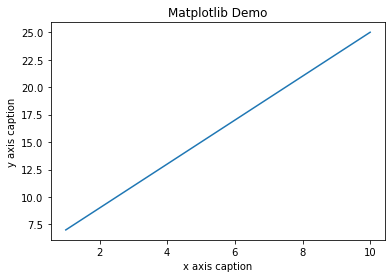

In [219]:
x = np.arange(1,11)
y = 2 * x + 5
plt.title("Matplotlib Demo")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.plot(x,y)
plt.show()

In [220]:
# fname 为 你下载的字体库路径，注意 SourceHanSansSC-Bold.otf 字体的路径
zhfont1 = matplotlib.font_manager.FontProperties(fname="./file/SourceHanSansSC-Bold.otf") 

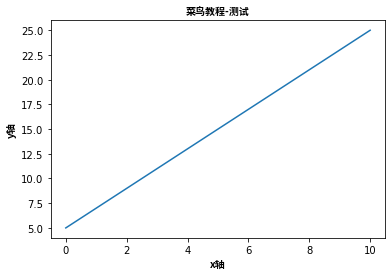

In [224]:
x = np.arange(11)
y = 2 * x + 5
plt.title('菜鸟教程-测试', fontproperties=zhfont1)
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel('x轴', fontproperties=zhfont1)
plt.ylabel('y轴',fontproperties=zhfont1)
plt.plot(x,y)
plt.show()

In [228]:
# 此外，我们还可以使用系统的字体：
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)
# 打印出你的 font_manager 的 ttflist 中所有注册的名字，找一个看中文字体例如：STFangsong(仿宋）,然后添加以下代码即可：
plt.rcParams['font.family']=['STFangsong']

作为线性图的替代，可以通过向 plot() 函数添加格式字符串来显示离散值。 可以使用以下格式化字符。

| 函数 |  描述 | 函数 |  描述 | 
|  :----  |  :----  |  :----  |  :----  |
| '-' | 实线样式 |  '3' | 左箭头标记 |
| '--' | 短横线样式 |  '4' | 右箭头标记 |
| '-.' | 点划线样式 |  's' | 正方形标记 |
| ':' | 虚线样式 |  'p' | 五边形标记 |
| '.' | 点标记 |  '*' | 星形标记 |
| ',' | 像素标记 |  'h' | 六边形标记 1 |
| 'o' | 圆标记 | 'H' | 六边形标记 2 |
| 'v' | 倒三角标记 |  '+' | 加号标记 |
| '^' | 正三角标记 |  'x' | X 标记 |
| '&lt;'  | 左三角标记 |  'D' | 菱形标记 |
| '&gt;'  | 右三角标记 |  'd' | 窄菱形标记 |
| '1' | 下箭头标记 |  '&#124;' | 竖直线标记 |
| '2' | 上箭头标记 | '_' | 水平线标记 |


以下是颜色的缩写：

| 字符 |  颜色 |
|  :----  |  :----  |
|'b' | 蓝色 |
|'g' | 绿色 |
|'r' | 红色 | 
|'c' | 青色 | 
|'m' | 品红色 | 
|'y' |	黄色 |
|'k' | 黑色 |
|'w' |白色 |

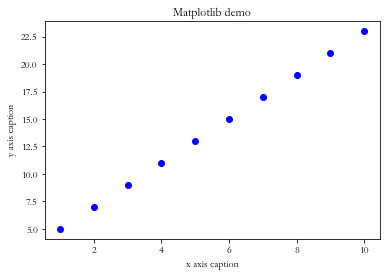

In [233]:
x = np.arange(1,11)
y = 2 * x + 3
plt.title("Matplotlib demo")
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
plt.plot(x,y,'ob')
plt.show()

### 绘制正弦波

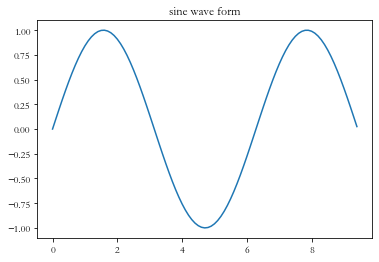

In [234]:
# 计算正弦曲线上点的 x 和 y 坐标
x = np.arange(0,  3  * np.pi,  0.1) 
y = np.sin(x)
plt.title("sine wave form")  
# 使用 matplotlib 来绘制点
plt.plot(x, y) 
plt.show()

### subplot()
subplot() 函数允许在同一图中绘制不同的东西。

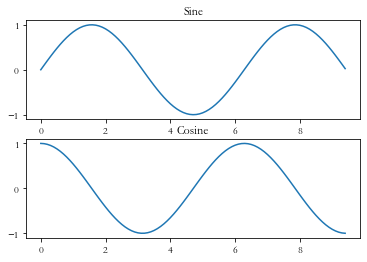

In [236]:
# 计算正弦和余弦曲线上的点的 x 和 y 坐标 
x = np.arange(0, 3 * np.pi, 0.1)
y_sin  = np.sin(x)
y_cos = np.cos(x)
# 建立 subplot 网格，高为 2，宽为 1  
# 激活第一个 subplot
plt.subplot(2, 1, 1)
# 绘制第一个图像 
plt.plot(x, y_sin) 
plt.title('Sine') 
# 将第二个 subplot 激活，并绘制第二个图像
plt.subplot(2,  1,  2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  
# 展示图像
plt.show()

### bar()
pyplot 子模块提供 bar() 函数来生成条形图。

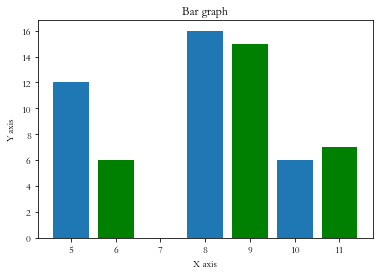

In [239]:
x =  [5,8,10] 
y =  [12,16,6] 
x2 =  [6,9,11] 
y2 =  [6,15,7] 
plt.bar(x, y, align =  'center') 
plt.bar(x2, y2, color='g', align='center')
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 
plt.show()

### numpy.histogram()
numpy.histogram() 函数是数据的频率分布的图形表示。 水平尺寸相等的矩形对应于类间隔，称为 bin，变量 height 对应于频率。

numpy.histogram()函数将输入数组和 bin 作为两个参数。 bin 数组中的连续元素用作每个 bin 的边界。

In [240]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
np.histogram(a, bins = [0,20,40,60,80,100])
hist,bins = np.histogram(a,bins =  [0,20,40,60,80,100])  
print (hist) 
print (bins)

[3 4 5 2 1]
[  0  20  40  60  80 100]


### plt()
Matplotlib 可以将直方图的数字表示转换为图形。 pyplot 子模块的 plt() 函数将包含数据和 bin 数组的数组作为参数，并转换为直方图。

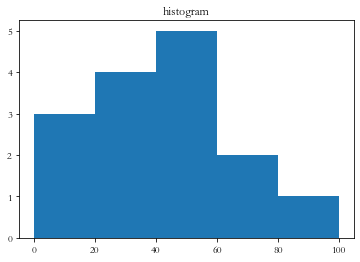

In [242]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(a, bins =  [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()